In [2]:
import scanpy as sc

In [7]:
pheno_path = "../../NextProject/data/OneK1K/Count.h5ad"

In [9]:
mat = sc.read_h5ad(pheno_path)

In [13]:
# check uniqueness of gene_id (ensembl_id)
mat.var
len(mat.var.index) == len(mat.var.index.unique())

True

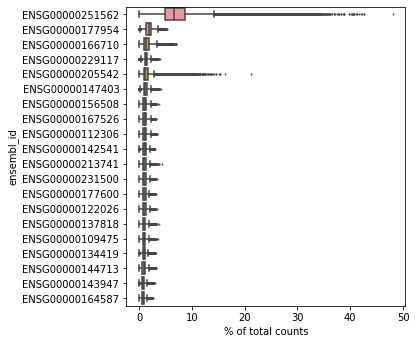

In [15]:
# show genes that are highly expressed
sc.pl.highest_expr_genes(mat, n_top=20, )

### Basic filtering

In [16]:
# Keep cells with >= 200 genes expressed
sc.pp.filter_cells(mat, min_genes=200)

# Keep genes that expressed in >= 3 cells
sc.pp.filter_genes(mat, min_cells=3)

In [22]:
mat

AnnData object with n_obs × n_vars = 1248980 × 28891
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'donor_id', 'pool_number', 'predicted.celltype.l2', 'predicted.celltype.l2.score', 'age', 'organism_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'n_genes'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells'
    uns: 'cell_type_ontology_term_id_colors', 'default_embedding', 'schema_version', 'title'
    obsm: 'X_azimuth_spca', 'X_azimuth_umap', 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'

In [19]:
mat.var_names

Index(['ENSG00000243485', 'ENSG00000238009', 'ENSG00000239945',
       'ENSG00000241860', 'ENSG00000241599', 'ENSG00000286448',
       'ENSG00000229905', 'ENSG00000237491', 'ENSG00000177757',
       'ENSG00000228794',
       ...
       'ENSG00000198712', 'ENSG00000228253', 'ENSG00000198899',
       'ENSG00000198938', 'ENSG00000198840', 'ENSG00000212907',
       'ENSG00000198886', 'ENSG00000198786', 'ENSG00000198695',
       'ENSG00000198727'],
      dtype='object', name='ensembl_id', length=28891)

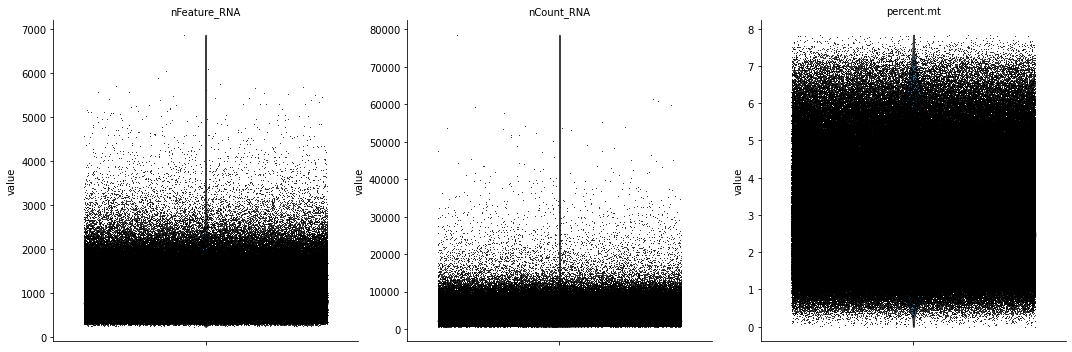

In [25]:
sc.pl.violin(mat, ['nFeature_RNA', 'nCount_RNA', 'percent.mt'],
             jitter=0.4, multi_panel=True)

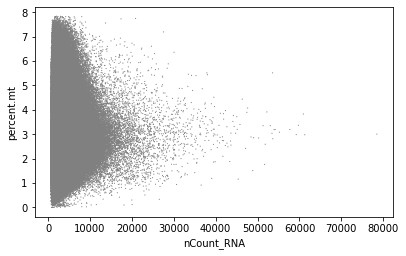

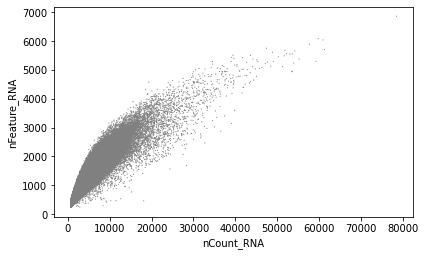

In [28]:
sc.pl.scatter(mat, x='nCount_RNA', y='percent.mt', size = 5)
sc.pl.scatter(mat, x='nCount_RNA', y='nFeature_RNA', size = 5)

In [ ]:
sc.pp.filter_cells(mat, max_genes=5000)

In [ ]:
mat = mat[mat.obs['percent.mt'] < 5]